## Proyecto EDA - Luis Alpizar

In [17]:
# Importacion de Librerias
# Registro y Depuración
import logging

# Manejo de Datos y Análisis
import pandas as pd
import numpy as np

# Visualización de Datos
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning
from sklearn.preprocessing import OneHotEncoder, LabelEncoder # Preprocesamiento
from sklearn.impute import SimpleImputer # Preprocesamiento
from sklearn.model_selection import train_test_split # División de Datos
from sklearn.linear_model import LogisticRegression # Modelado
from sklearn.pipeline import Pipeline # Pipelines
from sklearn.compose import ColumnTransformer # Pipelines
from sklearn.metrics import accuracy_score # Evaluación


# Configuración del registro
logger = logging.getLogger()
logger.setLevel(logging.ERROR)


### 1. Data loading

Objective: Obtain the data from source and get a first glimpse of their properties and presentation


In [18]:
df_raw = pd.read_csv('../data/raw/AB_NYC_2019.csv')
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [19]:
#df_raw.isnull().sum()
df_raw.isna().sum()


id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [20]:
df_raw.sample(10, random_state=2025)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
11913,9277608,Soho 3BR/2BA Everything is just outside your d...,42047615,Jonathan & Nancy,Manhattan,Nolita,40.72347,-73.99302,Entire home/apt,650,3,130,2019-06-05,3.11,2,235
2206,1032127,Short Term Stay in Chelsea/MP NYC,5679237,Renee,Manhattan,Chelsea,40.74583,-74.00363,Entire home/apt,275,7,0,NaN,NaN,1,188
17213,13623700,Spacious and Quiet Gramercy 1 Bedroom,21656569,Alana,Manhattan,Gramercy,40.73577,-73.98057,Entire home/apt,275,5,0,NaN,NaN,1,0
14889,11817955,Artist's Loft - South Park Slope,4629474,Jonathan,Brooklyn,Sunset Park,40.66162,-73.99122,Entire home/apt,179,3,0,NaN,NaN,1,0
43064,33428068,Central Location: Excellent travelers bed,247189581,Helena,Brooklyn,Fort Greene,40.68528,-73.97285,Shared room,32,2,6,2019-06-06,1.78,5,31
449,158290,Clinton Hill + Free Coffee = #smile,759583,Pepe,Brooklyn,Clinton Hill,40.68288,-73.96024,Private room,75,3,43,2019-05-20,0.44,2,365
25988,20754847,Super Comfy Double Bed in new 2 story house!,23861295,Beth,Brooklyn,East Flatbush,40.64350,-73.94011,Private room,47,1,4,2019-06-23,2.73,1,63
7675,5792144,Wall Street luxury short term stay,15175443,Val,Manhattan,Financial District,40.70471,-74.00817,Private room,150,3,2,2015-07-28,0.04,1,0
13069,9894820,Upper East Side Manhattan 2 Bedroom,50894847,Aidan,Manhattan,Upper East Side,40.76920,-73.96754,Entire home/apt,149,1,1,2015-12-19,0.02,1,0
21264,16897611,"1 Bedroom in nice, clean LES apartment",112763616,Gaurav,Manhattan,Lower East Side,40.71873,-73.99073,Private room,95,1,3,2017-09-27,0.13,1,0



### 2. Data preprocessing

Objectives: Perform the data cleaning, data transformation and data reduction steps to avoid data mistmatching, noisy data or data not wrangled


In [21]:
df_baking = df_raw.copy()
df_baking = df_raw.drop(['id','name','host_id', 'host_name','latitude', 'longitude','last_review','reviews_per_month'],axis=1) #Elimina columnas no necesarias para el EDA

#Transforma columnas de texto a categoricas
df_baking['neighbourhood_group'] = df_baking['neighbourhood_group'].astype('category')
df_baking['neighbourhood'] = df_baking['neighbourhood'].astype('category')
df_baking['room_type'] = df_baking['room_type'].astype('category')

#Eliminacion de filas con Price = 0
df_baking = df_baking[df_baking['price'] != 0]

df_baking.info()
df_baking.sample(10, random_state=2025)

<class 'pandas.core.frame.DataFrame'>
Index: 48884 entries, 0 to 48894
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   neighbourhood_group             48884 non-null  category
 1   neighbourhood                   48884 non-null  category
 2   room_type                       48884 non-null  category
 3   price                           48884 non-null  int64   
 4   minimum_nights                  48884 non-null  int64   
 5   number_of_reviews               48884 non-null  int64   
 6   calculated_host_listings_count  48884 non-null  int64   
 7   availability_365                48884 non-null  int64   
dtypes: category(3), int64(5)
memory usage: 2.4 MB


,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
21670,Brooklyn,Crown Heights,Private room,54,2,53,1,8
15525,Manhattan,Upper West Side,Entire home/apt,200,3,5,1,0
14203,Manhattan,Harlem,Private room,40,3,4,1,0
12481,Manhattan,Hell's Kitchen,Entire home/apt,200,2,0,1,0
11608,Manhattan,Upper West Side,Entire home/apt,88,29,71,1,95
26372,Manhattan,SoHo,Private room,175,3,20,2,239
25821,Brooklyn,Bushwick,Private room,90,4,17,1,0
47871,Manhattan,Hell's Kitchen,Entire home/apt,200,3,1,1,39
3910,Manhattan,Hell's Kitchen,Private room,124,5,263,2,236
2167,Brooklyn,Bushwick,Private room,50,3,92,3,171


In [22]:
df = df_baking.copy()
df.head()

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,Private room,149,1,9,6,365
1,Manhattan,Midtown,Entire home/apt,225,1,45,2,355
2,Manhattan,Harlem,Private room,150,3,0,1,365
3,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,1,194
4,Manhattan,East Harlem,Entire home/apt,80,10,9,1,0



### 3. Exploratory Data Analysis

Objective: Summarize the main characteristics of the dataset using descriptive statistics and data visualization methods


In [23]:
#Divide el dataset df en dos subconjuntos: df_train (entrenamiento 0.8) y df_test (prueba 0.2).
df_train, df_test = train_test_split(df, random_state=2025, test_size=0.2, stratify=df['room_type'])
df_train = df_train.reset_index(drop=True) #Reinicia los índices del DataFrame df_train para mantener el orden de casa dato
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39107 entries, 0 to 39106
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   neighbourhood_group             39107 non-null  category
 1   neighbourhood                   39107 non-null  category
 2   room_type                       39107 non-null  category
 3   price                           39107 non-null  int64   
 4   minimum_nights                  39107 non-null  int64   
 5   number_of_reviews               39107 non-null  int64   
 6   calculated_host_listings_count  39107 non-null  int64   
 7   availability_365                39107 non-null  int64   
dtypes: category(3), int64(5)
memory usage: 1.7 MB


In [24]:
display(df_train.describe(include='number').T)
display(df_train.describe(include='category').T)

,count,mean,std,min,25%,50%,75%,max
price,39107.0,152.349605,225.735675,10.0,69.0,106.0,175.0,10000.0
minimum_nights,39107.0,7.050375,21.197411,1.0,1.0,2.0,5.0,1250.0
number_of_reviews,39107.0,23.205692,44.431615,0.0,1.0,5.0,24.0,607.0
calculated_host_listings_count,39107.0,7.105582,32.780111,1.0,1.0,1.0,2.0,327.0
availability_365,39107.0,112.991868,131.642110,0.0,0.0,45.0,227.5,365.0


,count,unique,top,freq
neighbourhood_group,39107,5,Manhattan,17306
neighbourhood,39107,217,Williamsburg,3148
room_type,39107,3,Entire home/apt,20326


#### - Analisis univariado

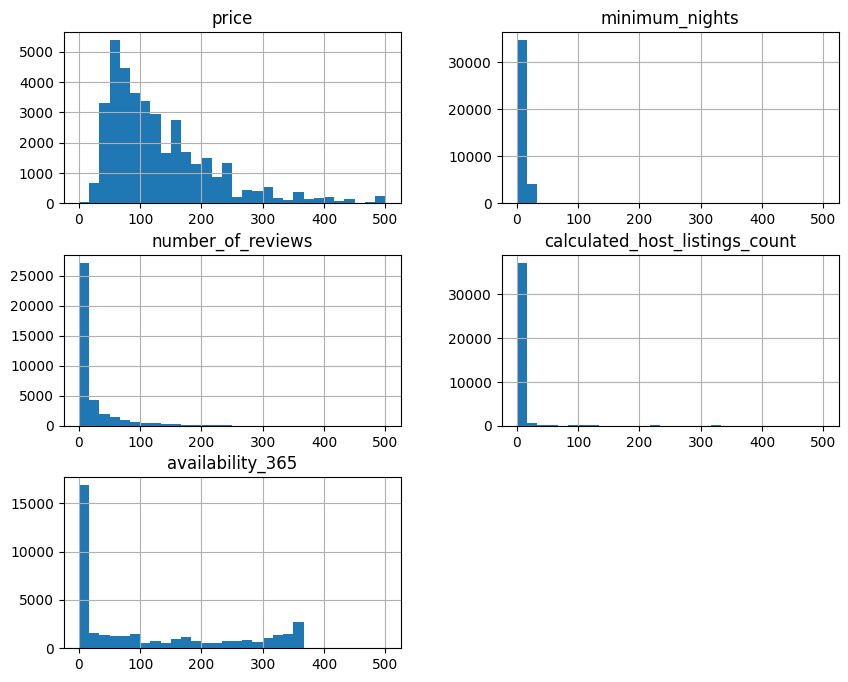

In [25]:
df_train.hist(bins=30, range=(0, 500), figsize=(10, 8))
plt.show()



##### Sesgo positivo en el histograma precio
- Precios Bajos Predominan: La mayoría de los anuncios tienen precios relativamente bajos, menos de 200 la noche.
- Algunos Precios Altos: Hay algunos anuncios con precios significativamente más altos, pero son menos frecuentes.
- Distribución Asimétrica: La distribución no es simétrica, lo que puede afectar ciertos análisis estadísticos que asumen normalidad.

#### - Análisis univariado de variables categóricas

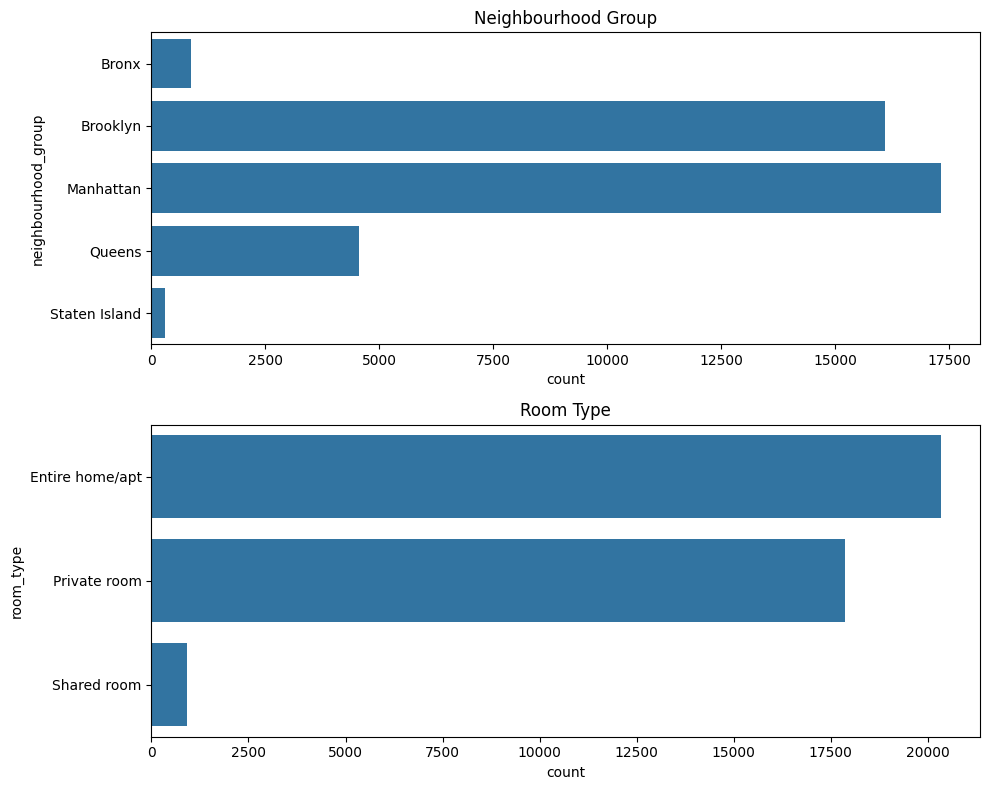

In [26]:

fig, ax = plt.subplots(2, 1, figsize=(10, 8))  # Ajustar el tamaño de la figura


sns.countplot(data=df_train, y='neighbourhood_group', ax=ax[0])
ax[0].set_title('Neighbourhood Group')

sns.countplot(data=df_train, y='room_type', ax=ax[1])
ax[1].set_title('Room Type')


plt.tight_layout()
plt.show()

#### - Analisis bivariado(Una variable contra otra)

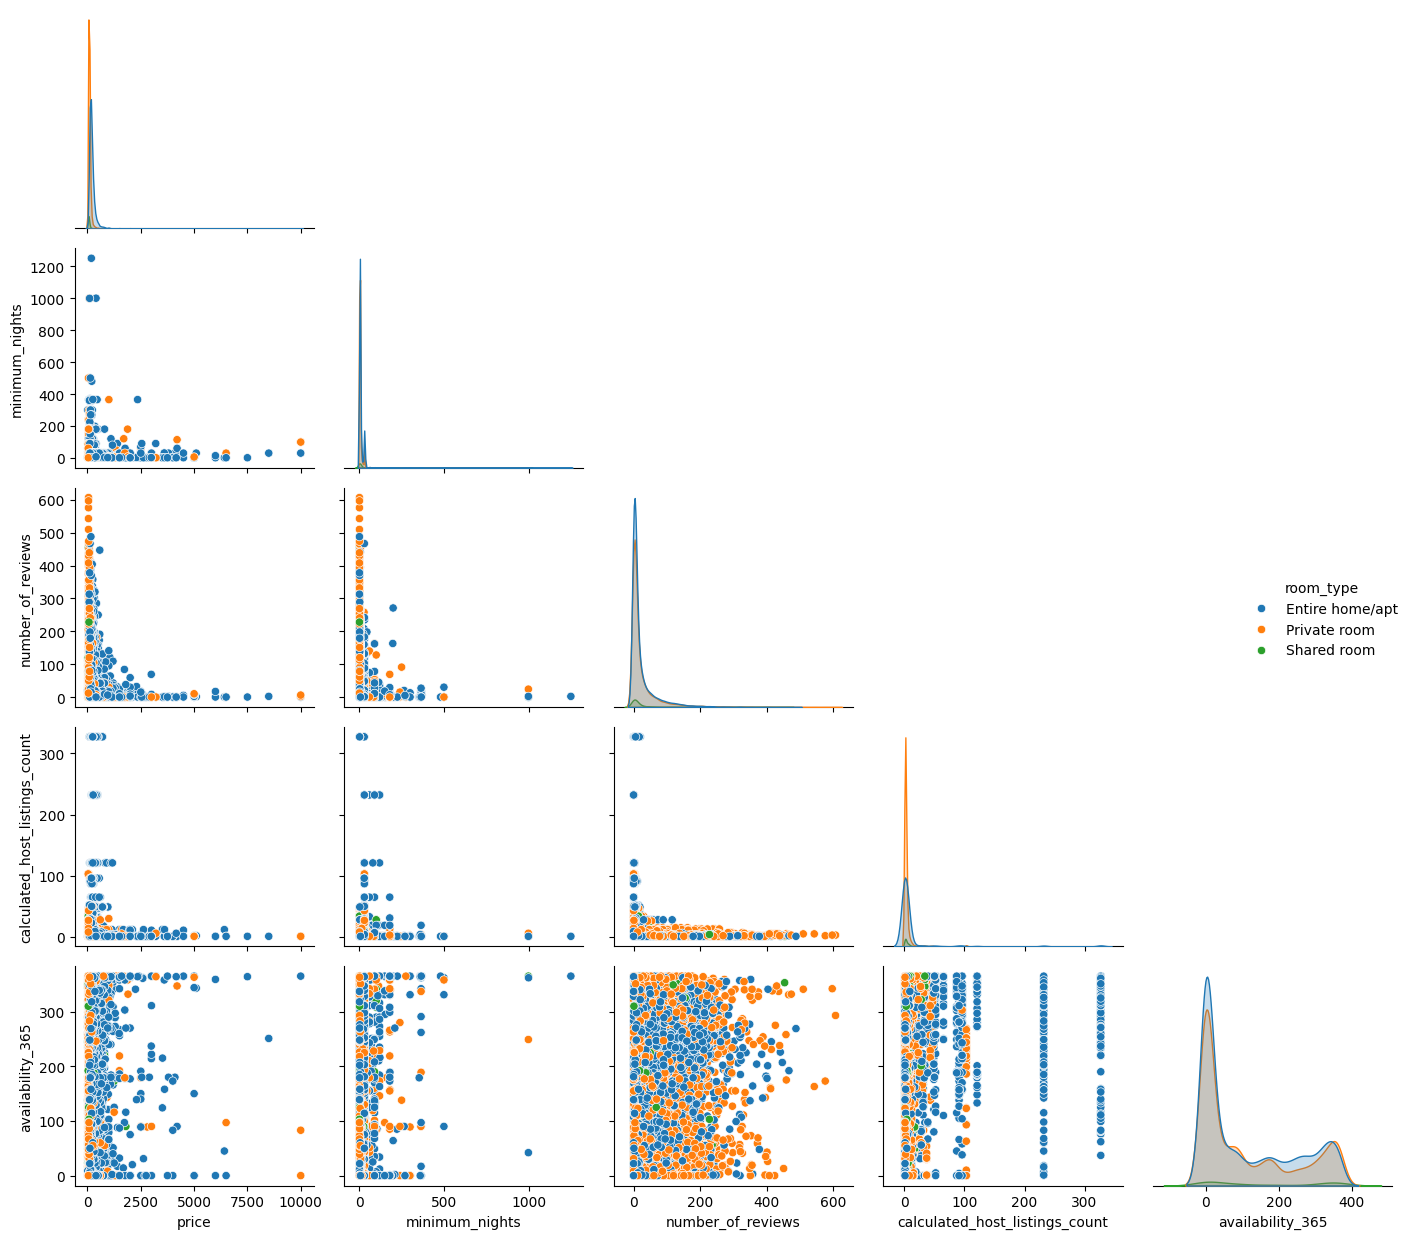

In [27]:

sns.pairplot(data=df_train, hue='room_type', corner=True) 
plt.tight_layout()
plt.show()

#### - Analisis univariado de variables categoricas

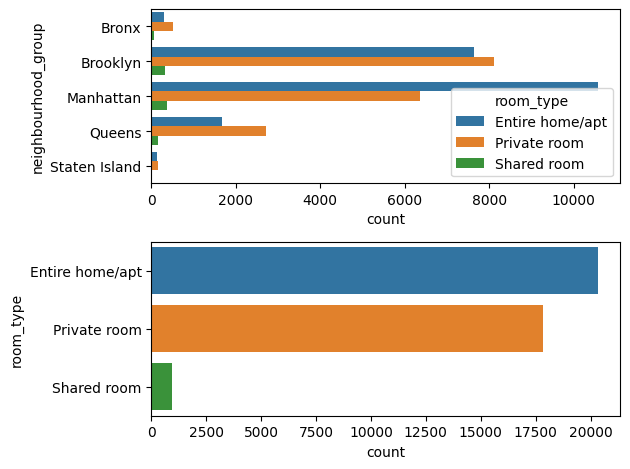

In [28]:
fig, ax = plt.subplots(2,1) 
sns.countplot(data=df_train, y='neighbourhood_group',hue = 'room_type',ax=ax[0])
sns.countplot(data=df_train, y='room_type',hue = 'room_type',ax=ax[1])
plt.tight_layout()
plt.show()

- El tipo de habitaciones que predominan en los anuncios son Entire room/Apt y Private room.
- Brooklyn y Manhatan tiene una mayor predominancia de publicaciones, unicamente seguido por Queens pero con ucha diferencia